In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
DAP_SPECIES = "PSIMIAE"
#DAP_SPECIES = "ECOLI"

In [3]:
selected_cols = ['chr', 'start', 'end', 'score', 'strand',
       'anno', 'intergenic_chr', 'intergenic_start', 'intergenic_end',
       'intergenic_label', 'u_type', 'u_start', 'u_end', 'u_ori',
       'u_accession', 'u_name', 'dw_type', 'd_start', 'd_end', 'd_ori',
       'd_accession', 'd_name', 'tf_id', 'species', 'target_location',
       'u_is_ortho', 'd_is_ortho', 'target_is_ortho']

In [4]:
def plot_intergenic_region(df_group):
    # iterate over each site, visulize it
    i = 0
    y_margin = 0.01
    offset = y_margin/4
    row = df_group.head(1)
    xscale = 0.05
    range_start = row.intergenic_start.values[0]
    range_end   = row.intergenic_end.values[0]
    x_size = (range_end - range_start) * xscale

    fig, ax = plt.subplots(figsize=(x_size, 1))
    fig.patch.set_facecolor("white")

    for ix, row in df_group.iterrows():
        x1 = row.start
        x2 = row.end
        sign = -1 if row.strand == "-" else 1 
        y =  (y_margin + i*offset) * sign
        color = 'b' if sign>0 else 'r'

        ticks = np.arange(range_start, range_end,10)
        u_gene_ori = " ▶ " if row.u_ori=="+" else " ◀ "
        d_gene_ori = " ▶ " if row.d_ori=="+" else " ◀ "
        species = row.species
        tf_id   = str(row.tf_id)
        title = f"TF{tf_id}, {species}"
        u_gene_name = row.u_name if row.u_name != "_na_" else row.u_accession
        d_gene_name = row.d_name if row.d_name != "_na_" else row.d_accession
        
        labels = ['']*len(ticks)
        labels[0]  = u_gene_ori + u_gene_name
        labels[-1] = d_gene_name + d_gene_ori
        labels[0]  = labels[0].ljust(10)
        labels[-1]  = labels[-1].ljust(10)
        

        plt.plot([x1,x2],[y,y], c=color, lw=1)
        plt.plot([x1,x2],[0,0], c='b', lw=3)
        plt.ylim([-3*y_margin, 3*y_margin])
        plt.xlim([range_start, range_end])
        plt.xticks(ticks, labels, ha='left')
        plt.title(title, {'fontsize':8}, loc='left')
        
        ax.spines['bottom'].set_position(('data',0))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.tick_params(direction='out', pad=20)
        
        i += 1
    plt.show()

# Visualize all promoters a TF is bound

In [5]:
import pandas as pd
df_complete = pd.read_pickle(f"../data/{DAP_SPECIES}_RESULTS/ALL_FIMO_HITS_ANNOTATED.pkl")

# Use only ortholog hits
ortho_filter = df_complete.target_is_ortho 
df = df_complete[ortho_filter]

#df = df_complete

In [6]:
len(df)

3392

In [7]:
df[selected_cols].head(2)

chr   start     end  score strand  \
2   CP001978.1    6702    6722   46.3      -   
15  CP001978.1  425466  425485   51.1      +   

                                                 anno intergenic_chr  \
2   Name=Ps204_CP001978.1-;Alias=MEME-1;ID=Ps204-M...     CP001978.1   
15  Name=Ps539_CP001978.1+;Alias=MEME-1;ID=Ps539-M...     CP001978.1   

    intergenic_start  intergenic_end  intergenic_label  ...   d_end  d_ori  \
2               6310            6909  CP001978.1:00006  ...    8571      +   
15            425252          425506  CP001978.1:00375  ...  426031      -   

    d_accession d_name tf_id                      species target_location  \
2    ADP95771.1   _na_   204  Marinobacter_adhaerens_HP15            both   
15   ADP96191.1   _na_   539  Marinobacter_adhaerens_HP15        upstream   

    u_is_ortho  d_is_ortho target_is_ortho  
2         True       False            True  
15        True       False            True  

[2 rows x 28 columns]

In [8]:
np.sort(df.tf_id.unique())

array([  4,   6,  17,  21,  23,  24,  32,  34,  39,  41,  47,  48,  49,
        56,  57,  59,  61,  67,  70,  74,  76,  78,  80,  81,  86,  89,
       101, 103, 109, 113, 114, 118, 120, 129, 130, 135, 136, 138, 140,
       146, 156, 161, 167, 170, 172, 173, 177, 178, 181, 182, 185, 186,
       204, 210, 216, 218, 227, 228, 234, 240, 241, 242, 244, 249, 261,
       267, 268, 270, 278, 286, 291, 293, 299, 302, 306, 309, 333, 338,
       340, 342, 344, 356, 367, 368, 373, 376, 377, 379, 380, 393, 396,
       404, 405, 408, 412, 413, 415, 428, 435, 437, 438, 453, 459, 467,
       480, 501, 502, 524, 531, 534, 539, 548, 552])

# Visualize a certain TF's binding sites

In [24]:
tf_id = 32
tf_id = "mraZ"
tf_id = 204
tf_id = 453
tf_id = 4

In [25]:
tf_filter = (df.tf_id == tf_id)
df_tf = df[tf_filter]
len(df_tf)

127

<AxesSubplot:>

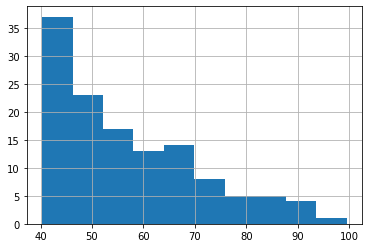

In [26]:
df_tf['score'].hist()

Number of targeted promoters by TF 4: 50
CP001978.1:02693


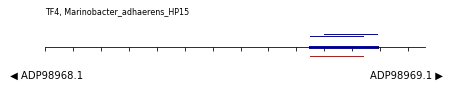

CP007637.1:00064


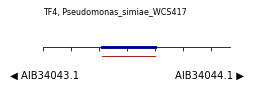

CP007637.1:00073


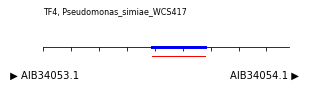

CP007637.1:00559


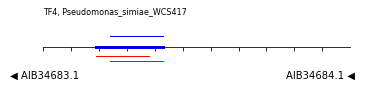

CP007637.1:00811


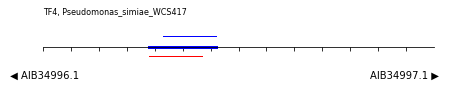

CP007637.1:02401


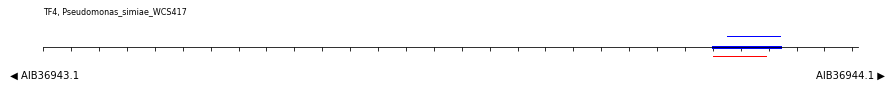

CP007637.1:03988


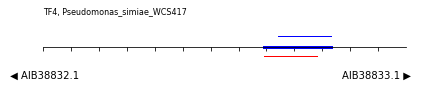

CP007637.1:04486


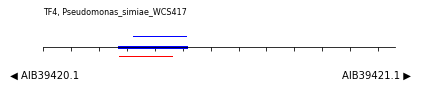

CP007637.1:04487


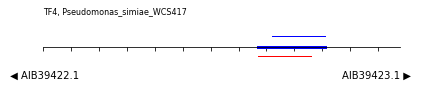

CP007637.1:04497


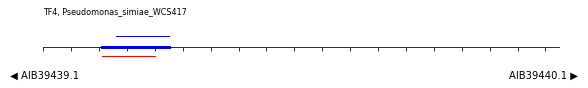

NC_002516.2:02471


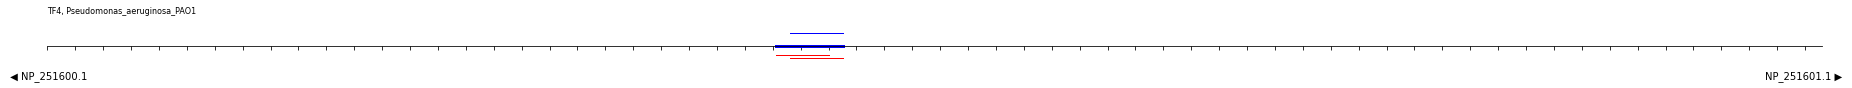

NC_002516.2:04104


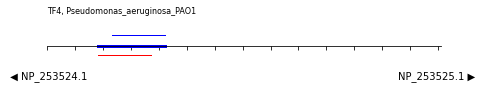

NC_002516.2:04701


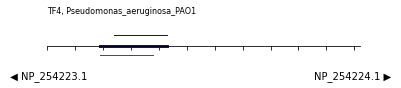

NC_002516.2:04702


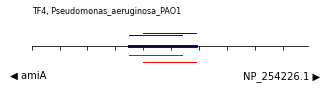

NC_002947.4:00443


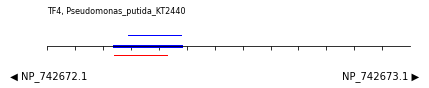

NC_002947.4:01218


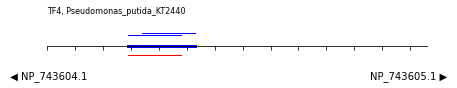

NC_002947.4:02781


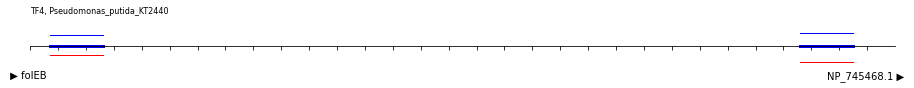

NC_002947.4:04541


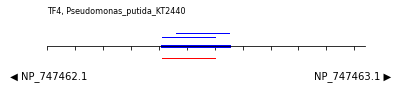

NC_003197.2:01995


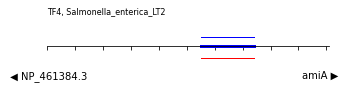

NC_008740.1:03195


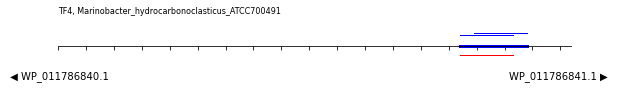

NC_009648.1:02394


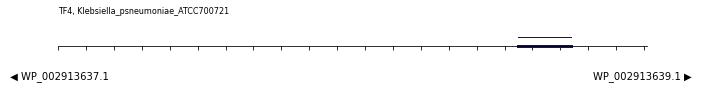

NC_009792.1:00581


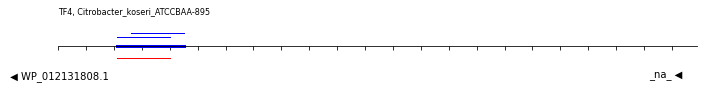

NC_011740.1:00559


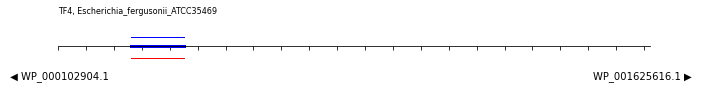

NC_019936.1:00597


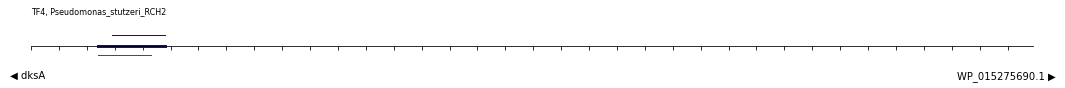

NC_019936.1:01736


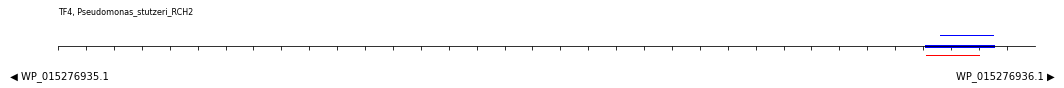

NC_019936.1:02528


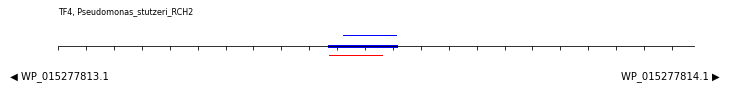

NZ_CP012830.1:00886


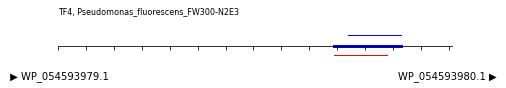

NZ_CP012830.1:01173


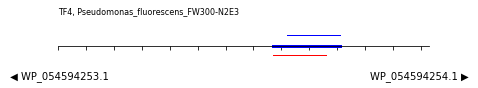

NZ_CP012830.1:01766


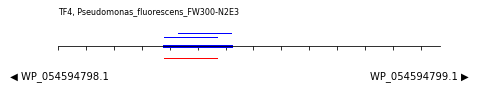

NZ_CP012830.1:01767


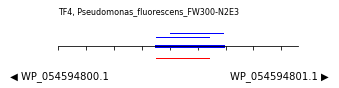

NZ_CP012831.1:02034


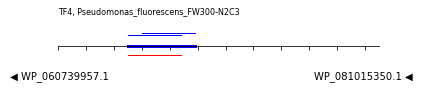

NZ_CP012831.1:02035


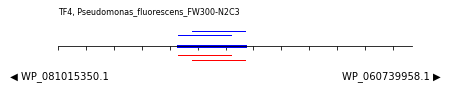

NZ_CP012831.1:02547


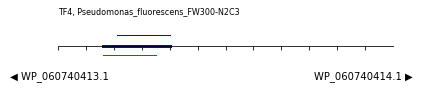

NZ_CP012831.1:02842


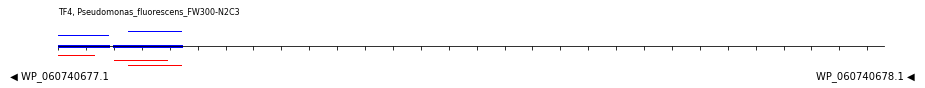

NZ_CP015225.1:03647


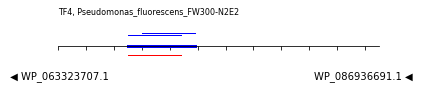

NZ_CP015225.1:03648


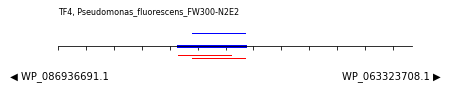

NZ_CP015225.1:04189


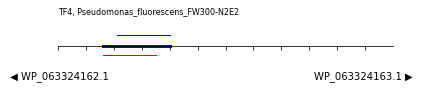

NZ_CP015225.1:04481


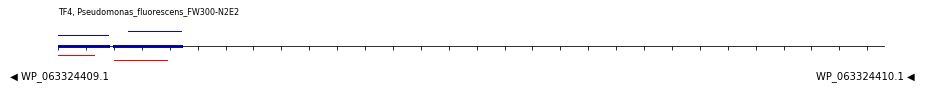

NZ_CP015511.1:02108


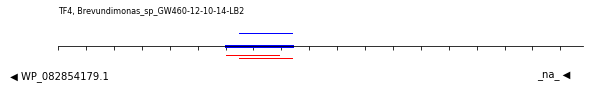

NZ_JIBD01000001.1:00116


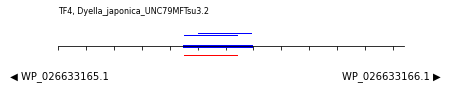

NZ_LKBJ01000002.1:00564


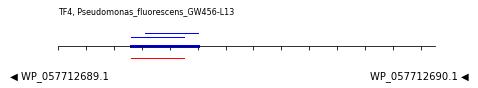

NZ_LKBJ01000002.1:00565


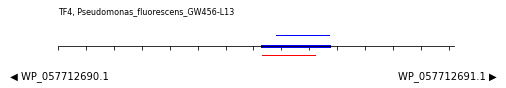

NZ_LKBJ01000002.1:01098


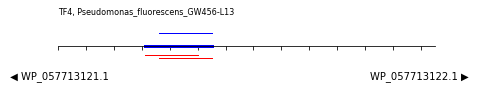

NZ_LUKJ01000003.1:02500


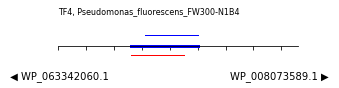

NZ_LUKJ01000003.1:02501


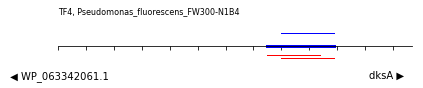

NZ_LUKJ01000003.1:03074


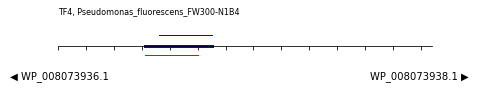

NZ_NGUN01000005.1:03463


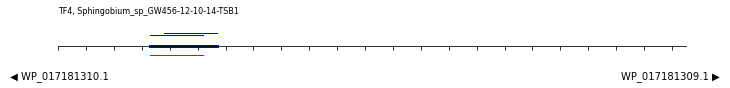

NZ_NGUN01000005.1:03465


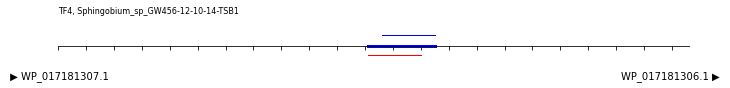

NZ_PGEN01000001.1:00366


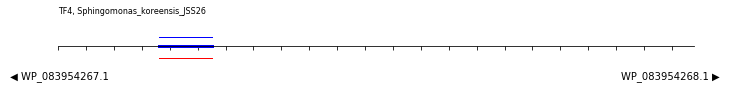

NZ_PGEN01000001.1:01866


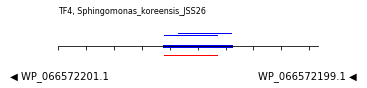

In [27]:
df_groups = df_tf.groupby(['intergenic_label'])
print(f"Number of targeted promoters by TF {tf_id}:", len(df_groups))
i = 0
for group_name, df_group in df_groups:
    print(group_name)
    plot_intergenic_region(df_group)
    i += 1
    if i==100:
        break

In [28]:
df.attrs['column_comments'] = {'somecolumn':'explanation etc'}